In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.pipeline import Pipeline
pipe_lr = Pipeline([('scl', StandardScaler()),
                    ('slr', LinearRegression())])
knn_lr = KNeighborsRegressor(n_neighbors = 3)

In [42]:
df=pd.read_csv("../data/cruise_ship_info.csv")
df.head()
cols_selected = ['Tonnage', 'passengers', 'length', 'cabins','crew']
X = df[cols_selected].iloc[:,0:4].values

y = df[cols_selected]['crew']
sc_y = StandardScaler()
train_score_lr = []
train_score_knn =  []

In [38]:
df.head()

,Ship_name,Cruise_line,Age,Tonnage,passengers,length,cabins,passenger_density,crew
0,Journey,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
1,Quest,Azamara,6,30.277,6.94,5.94,3.55,42.64,3.55
2,Celebration,Carnival,26,47.262,14.86,7.22,7.43,31.80,6.70
3,Conquest,Carnival,11,110.000,29.74,9.53,14.88,36.99,19.10
4,Destiny,Carnival,17,101.353,26.42,8.92,13.21,38.36,10.00


In [39]:
n = 15
for i in range(n):
    X_train, X_test, y_train, y_test = train_test_split( X, y,
                                      test_size=0.3, random_state=i)
    y_train = y_train.to_numpy()
    y_train_std = sc_y.fit_transform(y_train[:,
                                      np.newaxis]).flatten()
    train_score_lr = np.append(train_score_lr,
                               np.mean(cross_val_score(pipe_lr,
                               X_train, y_train_std,
                               scoring ='r2' , cv = 10)))
    train_score_knn = np.append(train_score_knn,
                                np.mean(cross_val_score(knn_lr,
                                X_train, y_train_std,
                                scoring ='r2' , cv = 10)))
train_mean_lr = np.mean(train_score_lr)
train_std_lr = np.std(train_score_lr)
train_mean_knn = np.mean(train_score_knn)
train_std_knn = np.std(train_score_knn)
print('R2 train for lr: %.3f +/- %.3f' %
                             (train_mean_lr,train_std_lr))
print('R2 train for knn_lr: %.3f +/- %.3f' %
                             (train_mean_knn,train_std_knn))

R2 train for lr: 0.914 +/- 0.013
R2 train for knn_lr: 0.843 +/- 0.033


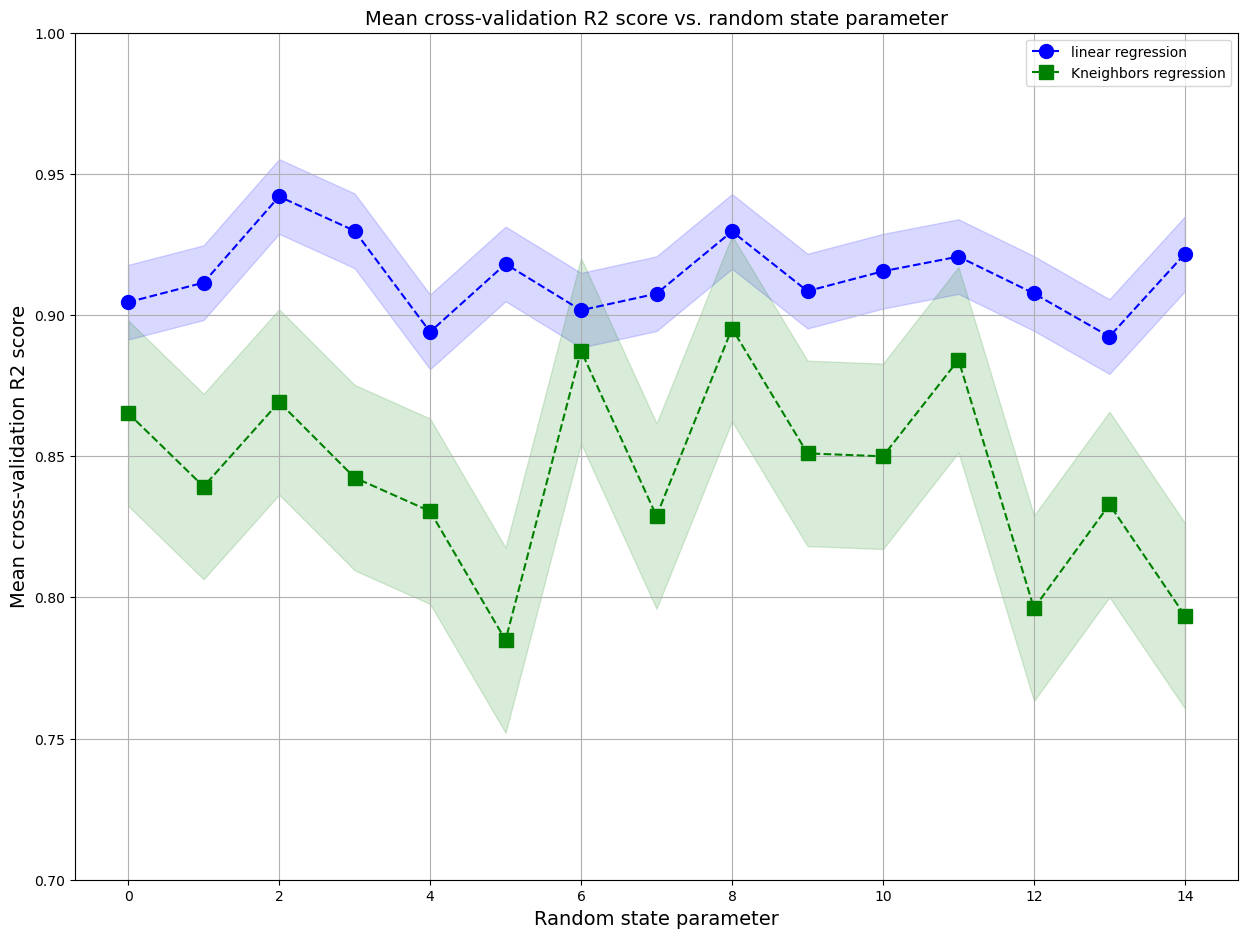

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,11))
plt.plot(range(n),train_score_lr,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='blue', markersize=10,
         label='linear regression')
plt.fill_between(range(n),
                 train_score_lr + train_std_lr,
                 train_score_lr - train_std_lr,
                 alpha=0.15, color='blue')
plt.plot(range(n),train_score_knn,color='green', linestyle='dashed',
         marker='s',markerfacecolor='green', markersize=10,
         label = 'Kneighbors regression')
plt.fill_between(range(n),
                 train_score_knn + train_std_knn,
                 train_score_knn - train_std_knn,
                 alpha=0.15, color='green')
plt.grid()
plt.ylim(0.7,1)
plt.title('Mean cross-validation R2 score vs. random state parameter', size = 14)
plt.xlabel('Random state parameter', size = 14)
plt.ylabel('Mean cross-validation R2 score', size = 14)
plt.legend()
plt.show()